One fascinating area of research uses GPS to track the movements of animals. It is now possible to manufacture a small GPS device that is solar charged, so you don’t need to change batteries and use it to track flight patterns of birds.
The data for this case study comes from the LifeWatch INBO project. Several data sets have been released as part of this project. We will use a small data set that consists of migration data for three gulls named Eric, Nico, and Sanne. The official_datasets; used dataset – CSV”>csv file contains eight columns and includes variables like latitude, longitude, altitude, and time stamps. In this case study, we will first load the data, visualize some simple flight trajectories, track flight speed, learn about daytime, and much, much more.

We will divide our case study into five parts:
1. Visualizing longitude and latitude data of the gulls.
2. Visualize the variation of the speed of the gulls.
3. Visualize the time required by the gulls to cover equal distances over the journey.
4. Visualize the daily mean speed of the gulls.
5. Cartographic view of the journey of the gulls.

PART (1/5): Latitude and Longitude.

In this part, we are going to visualize the location of the birds. We are going to plot latitude and longitude along the y and x-axis respectively and visualize the location data present in the csv file.

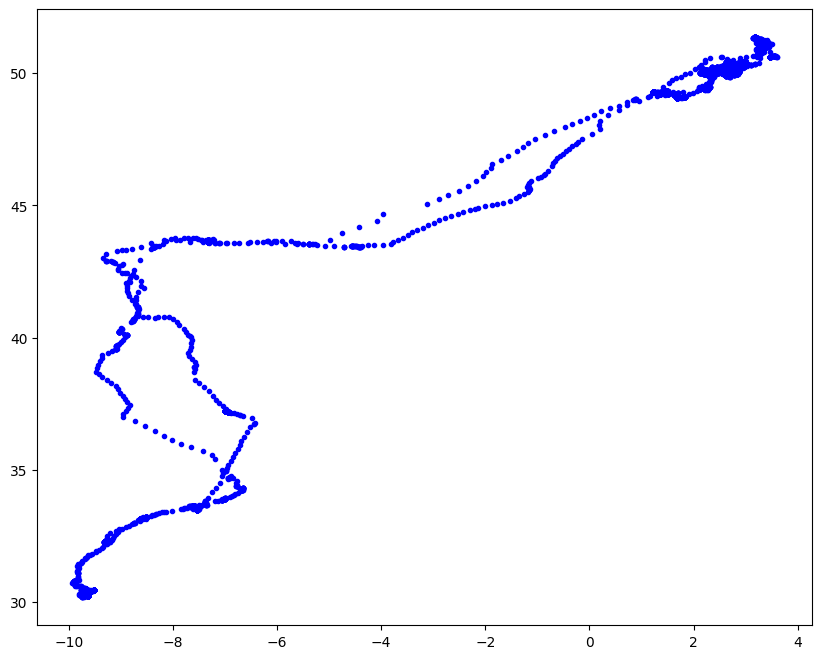

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


birddata = pd.read_csv("/content/bird_tracking.csv")
bird_names = pd.unique(birddata.bird_name)

# storing the indices of the bird Eric
ix = birddata.bird_name == "Eric"
x,y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize = (10,8))
plt.plot(x,y,"b.")

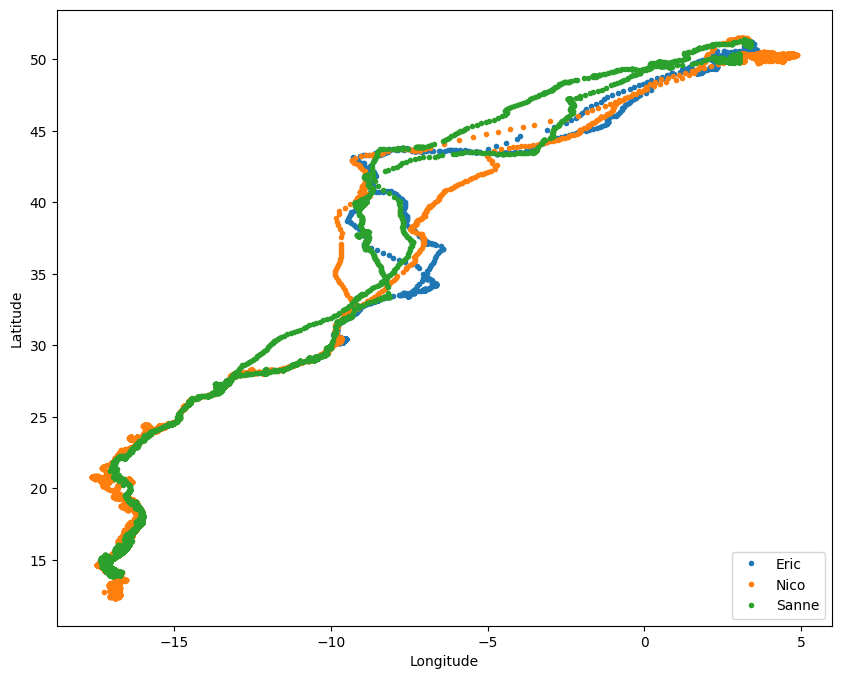

In [2]:
''' To look at all the birds trajectories,
    we plot each bird in the same plot '''
plt.figure(figsize = (10,8))
for bird_name in bird_names:

    # storing the indices of the bird Eric
    ix = birddata.bird_name == bird_name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

We use the matplotlib function, figure() to initialize size of the figure as 10 x 8 and plot it using the plot() function.The parameters inside the function plot() i.e x, y and “b.” are specifying to use longitude data along x axis(for x), latitude along y(for y) and b=blue, . = circles in the visualization.

PART (2/5): 2D Speed Vs Frequency.

In this second part of the case study, we are going to visualize 2D speed vs Frequency for the gull named “Eric”.

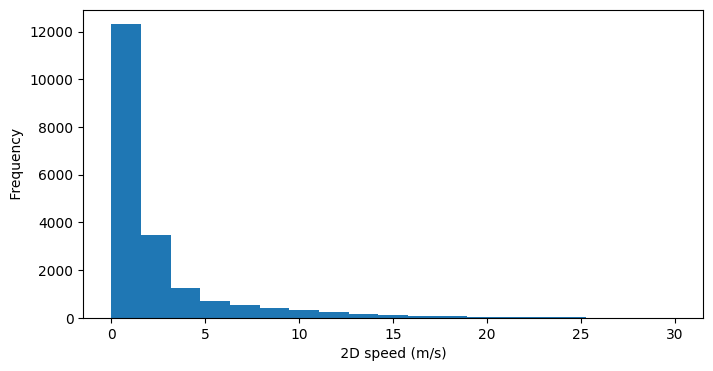

In [4]:
# storing the indices of the bird Eric
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]

plt.figure(figsize = (8,4))
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,30,20))
plt.xlabel(" 2D speed (m/s) ")
plt.ylabel(" Frequency ")
plt.show()

The parameters speed[~ind] indicates that we will include only those entries for which ind != True, bins=np.linspace(0,30,20) indicates the bins along the x-axis will vary from 0 to 30 with 20 bins within them, linearly spaced. Lastly, we plot 2D speed in m/s along the x-axis and Frequency along the y-axis using the xlabel() and ylabel() functions respectively and plot the data using plt.show().

PART (3/5): Time and Date.

The third part is associated with date and time. We are going to visualize the time(in days) required by Eric to cover constant distances through his journey. If he covers equal distances in an equal amount of time, then the Elapsed time vs Observation curve will be linear.

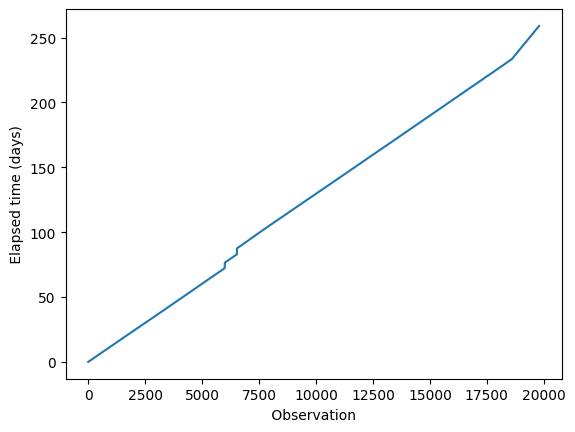

In [5]:
import datetime

timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time-times[0] for time in times]

plt.plot(np.array(elapsed_time)/datetime.timedelta(days=1))
plt.xlabel(" Observation ")
plt.ylabel(" Elapsed time (days) ")
plt.show()

“>>>datetime.datetime.today()”, returns the current Date (yy-mm-dd) & time (h:m:s).

“>>>date_str[:-3]”, slices/removes the UTC +00 coordinated time stamps.

“>>>datetime.datetime.strptime(date_str[:-3], “%Y-%m-%d %H:%M:%S”)” ,the time-stamp strings from date_str are converted to datetime object to be worked upon.                                                                 
“%Y-%m-%d %H:%M:%S” is the Year-Month-Date and Hour-Minute-Second format.

PART (4/5): Daily Mean Speed.

We are going to visualize the daily mean speed of the gull named “Eric” for the total number of days of recorded flight.

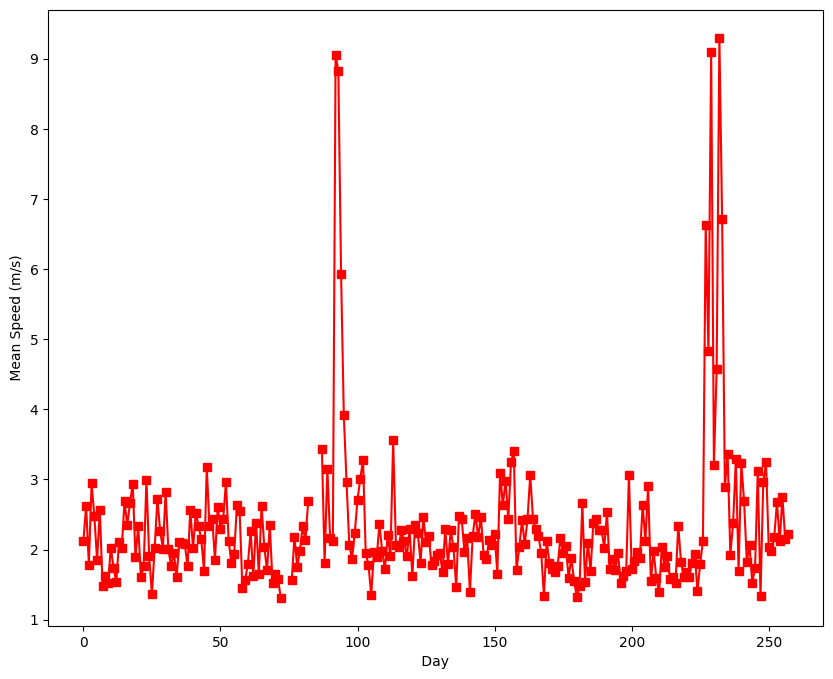

In [6]:
timestamps = []
for k in range(len(birddata)):
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))
birddata["timestamp"] = pd.Series(timestamps, index = birddata.index)

data =  birddata[birddata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time-times[0] for time in times]
elapsed_days = np.array(elapsed_time)/datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

plt.figure(figsize = (10,8))
plt.plot(daily_mean_speed, "rs-")
plt.xlabel(" Day ")
plt.ylabel(" Mean Speed (m/s) ");
plt.show()

enumerate() - is one of the built-in Python functions. It returns an enumerated object. In our case, that object is a list of tuples (immutable lists), each containing a pair of count/index and value.

PART (5/5): Cartographic View.

In this last part, we are going to track the Birds over a map.

In [10]:
!pip install cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 57.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


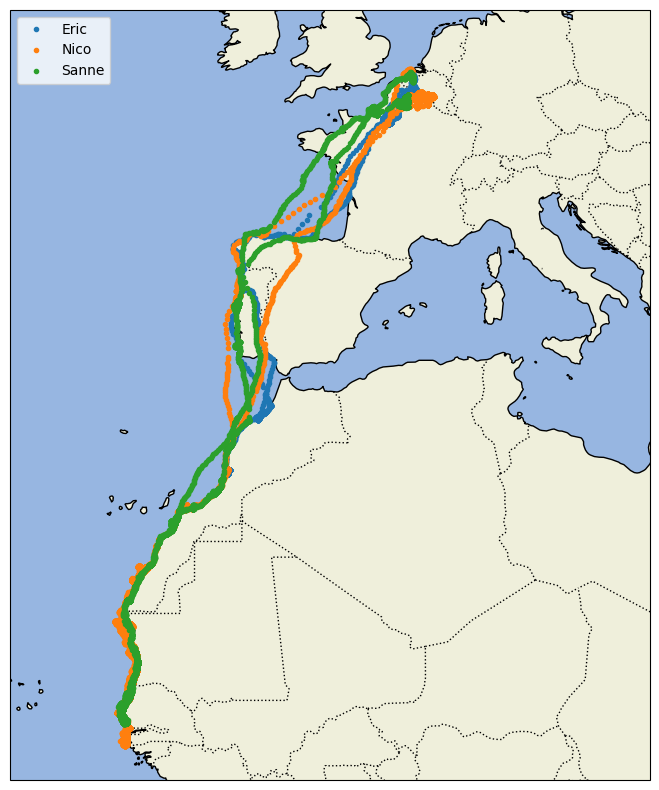

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y,'.', transform=ccrs.Geodetic(), label=name)
plt.legend(loc="upper left")
plt.show()